In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/GIT HUB/assignment/loan_themes_by_region (1).csv')

# The Loan Themes by Region dataset is uploaded. It is contained in df variable


In [ ]:
df.head()

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,...,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,...,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,...,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
3,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,604950,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
4,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000002X1Uu,Sanitation,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,275,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15736 entries, 0 to 15735
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Partner ID          15736 non-null  int64  
 1   Field Partner Name  15736 non-null  object 
 2   sector              15736 non-null  object 
 3   Loan Theme ID       15736 non-null  object 
 4   Loan Theme Type     15736 non-null  object 
 5   country             15736 non-null  object 
 6   forkiva             15736 non-null  object 
 7   region              15736 non-null  object 
 8   geocode_old         1200 non-null   object 
 9   ISO                 15722 non-null  object 
 10  number              15736 non-null  int64  
 11  amount              15736 non-null  int64  
 12  LocationName        15736 non-null  object 
 13  geocode             13662 non-null  object 
 14  names               13661 non-null  object 
 15  geo                 15736 non-null  object 
 16  lat 

# The information shows that we have missing values. we will assign them in different data types to make our explanatory analysis.

In [ ]:
df.isnull().sum()

,0
Partner ID,0
Field Partner Name,0
sector,0
Loan Theme ID,0
Loan Theme Type,0
country,0
forkiva,0
region,0
geocode_old,14536
ISO,14


# the isnull().sum() function shows that how many missing values are present in what features. We will try to handle them according to their importance and proportion to the dataset.

In [ ]:
df.drop(columns=['geocode_old', 'mpi_geo'], inplace= True)

# because of having high proportion of missing values we dropped geocode_old and mpi_geo

In [ ]:
df['ISO'].fillna('unknown', inplace=True)
df['geocode'].fillna('unknown', inplace=True)
df['names'].fillna('unknown', inplace=True)
df['mpi_region'].fillna('unknown', inplace=True)
df['rural_pct'].fillna(df['rural_pct'].median(), inplace=True)
df.dropna(subset=['lat' , 'lon'], inplace=True)

Missing values in categorical features are replaced with "Unknown," as their occurrence is minimal and can be grouped into a new category. Additionally, for geographical features, rows with missing values are removed entirely

In [ ]:
df['amount'] = df['amount'].astype(float)
df['rural_pct'] = df['rural_pct'].astype(float)
categorical_columns = ['Field Partner Name' , 'sector', 'Loan Theme ID', 'Loan Theme Type', 'forkiva', 'region', 'ISO', 'LocationName', 'geo', 'mpi_region']
df[categorical_columns] = df[categorical_columns].astype('category')

here all the features are converted according to their datatypes based on the values.

In [ ]:
df.isnull().sum()

,0
Partner ID,0
Field Partner Name,0
sector,0
Loan Theme ID,0
Loan Theme Type,0
country,0
forkiva,0
region,0
ISO,0
number,0


Now we can see that there are no missing vlues

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13662 entries, 0 to 15735
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Partner ID          13662 non-null  int64   
 1   Field Partner Name  13662 non-null  category
 2   sector              13662 non-null  category
 3   Loan Theme ID       13662 non-null  category
 4   Loan Theme Type     13662 non-null  category
 5   country             13662 non-null  object  
 6   forkiva             13662 non-null  category
 7   region              13662 non-null  category
 8   ISO                 13662 non-null  category
 9   number              13662 non-null  int64   
 10  amount              13662 non-null  float64 
 11  LocationName        13662 non-null  category
 12  geocode             13662 non-null  object  
 13  names               13662 non-null  object  
 14  geo                 13662 non-null  category
 15  lat                 13662 non-null  float

In [ ]:
df.describe()

,Partner ID,number,amount,lat,lon,rural_pct
count,13662.000000,13662.000000,1.366200e+04,13662.000000,13662.000000,13662.000000
mean,184.401332,59.275655,2.223745e+04,14.328878,29.433569,66.783121
std,110.018643,429.616795,1.026640e+05,16.757689,83.255739,25.699009
min,9.000000,1.000000,2.500000e+01,-34.610548,-172.790661,0.000000
25%,123.000000,1.000000,1.025000e+03,6.266728,-71.967463,60.000000
50%,151.000000,4.000000,3.000000e+03,13.484101,41.899993,73.000000
75%,204.000000,16.000000,1.010000e+04,22.189940,106.677321,84.000000
max,545.000000,22538.000000,4.929900e+06,51.314017,159.972900,100.000000


<ipython-input-12-ad9841fc5244>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='sector', order=df['sector'].value_counts().index, palette='viridis')


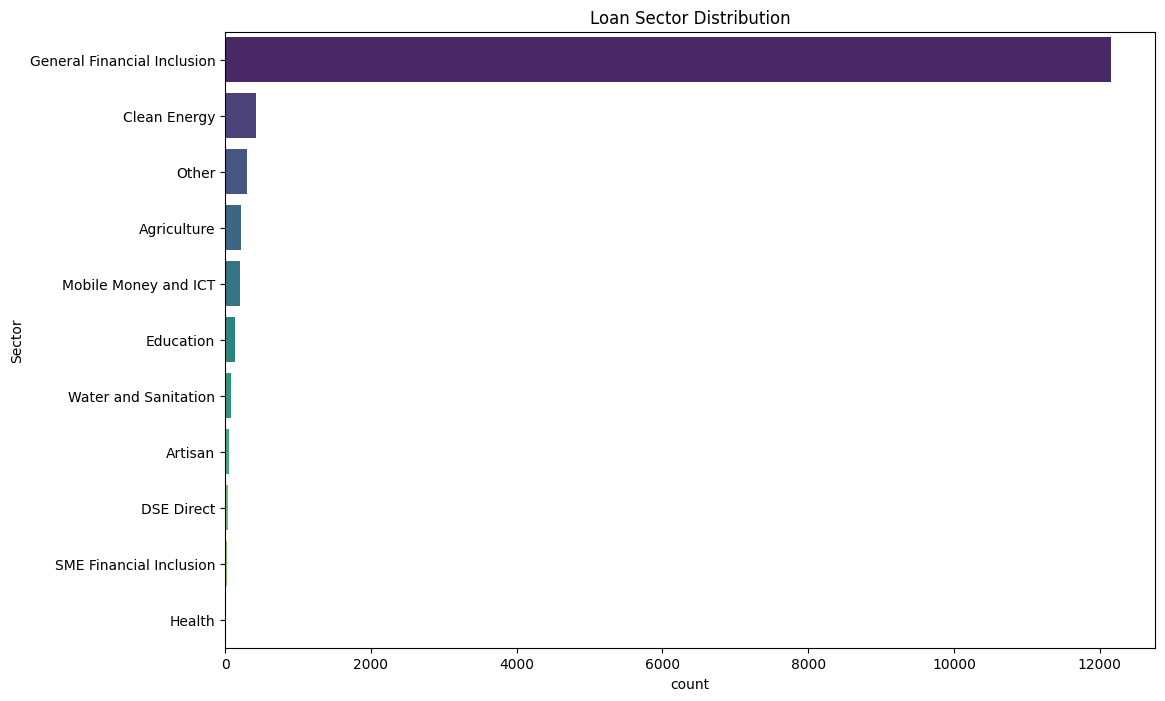

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='sector', order=df['sector'].value_counts().index, palette='viridis')
plt.title('Loan Sector Distribution')
plt.xlabel('count')
plt.ylabel('Sector')
plt.show()

From the countplot above, the General Financial Inclusion exceeds all the other loans in terms of disbursment.

<ipython-input-13-ac8fb5443f85>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Loan Theme Type', order=df['Loan Theme Type'].value_counts().index[:10], palette='viridis')


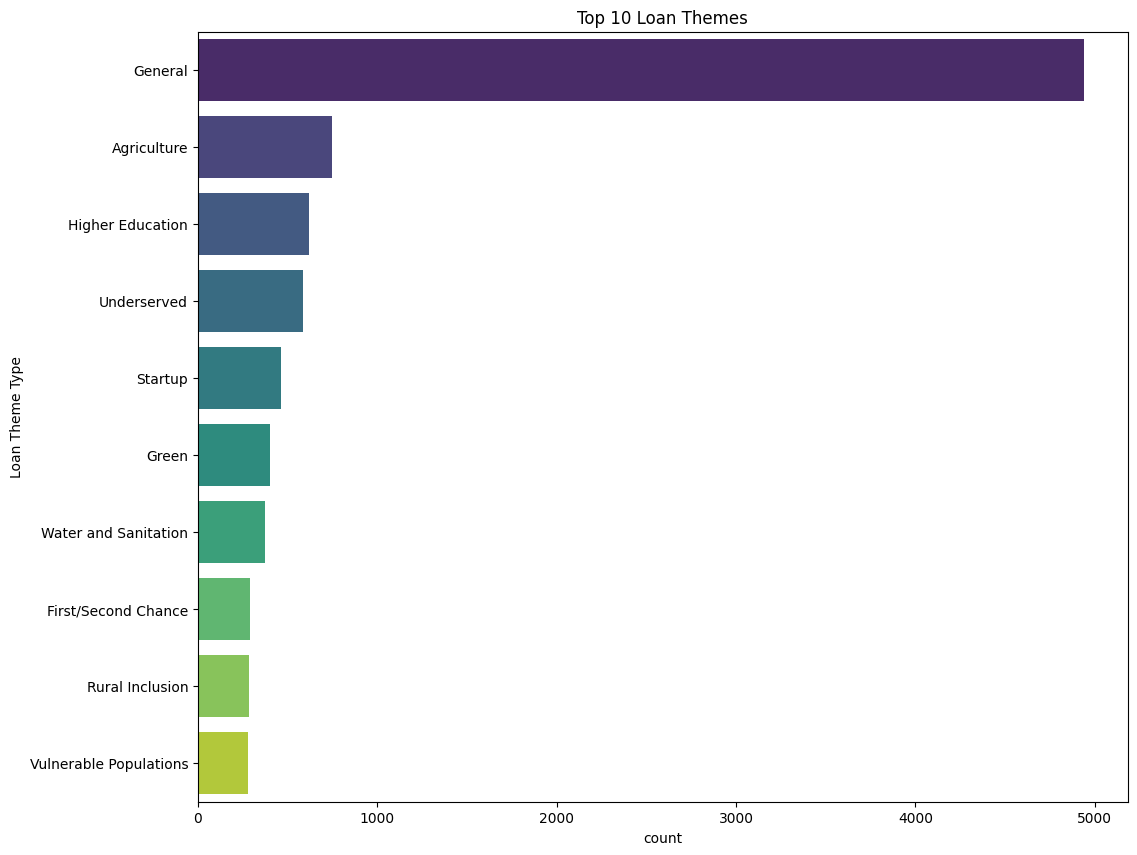

In [ ]:
plt.figure(figsize=(12, 10))
sns.countplot(data=df, y='Loan Theme Type', order=df['Loan Theme Type'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Loan Themes')
plt.xlabel('count')
plt.ylabel('Loan Theme Type')
plt.show()

From the barchart we can see that the General Loan has always been popular among people. Then comes agriculture, Higher Education and so on.

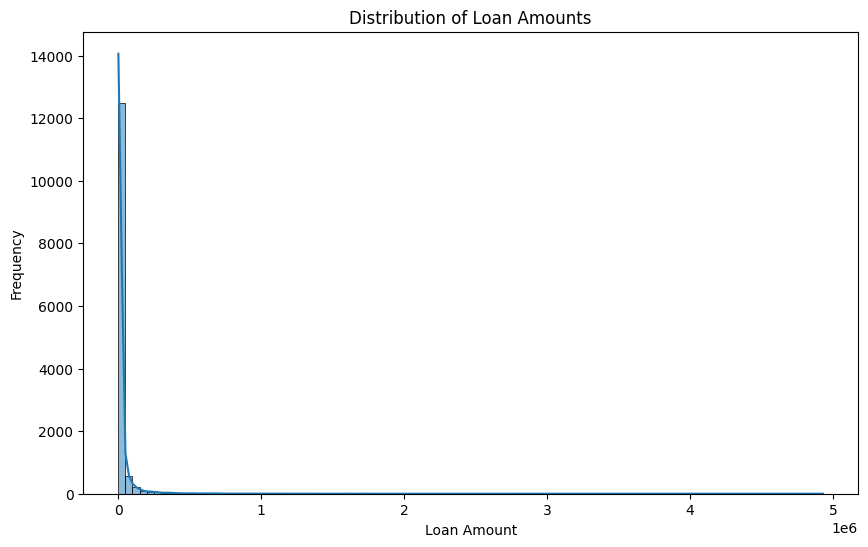

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], bins = 100, kde=True)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

Here we can see that the short amount loans are  more popular than long ammount of loans.

<ipython-input-15-84bc793ed818>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y= 'Field Partner Name', order=df['Field Partner Name'].value_counts().index[:10], palette='viridis')


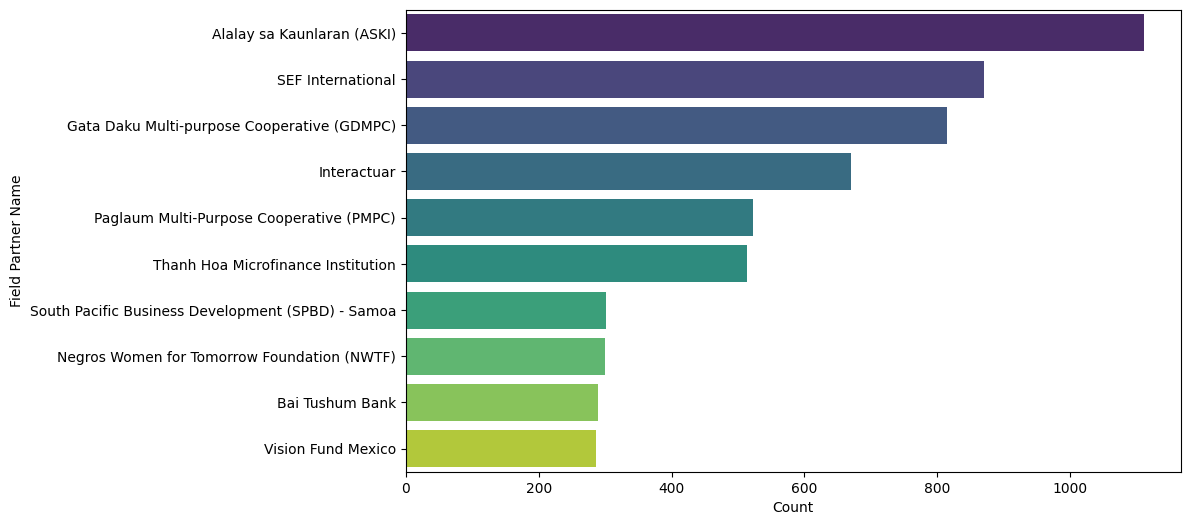

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y= 'Field Partner Name', order=df['Field Partner Name'].value_counts().index[:10], palette='viridis')
plt.xlabel('Count')
plt.ylabel('Field Partner Name')
plt.show()

We can see that many field partners are present to reach out to unblanked people with loan facilities.

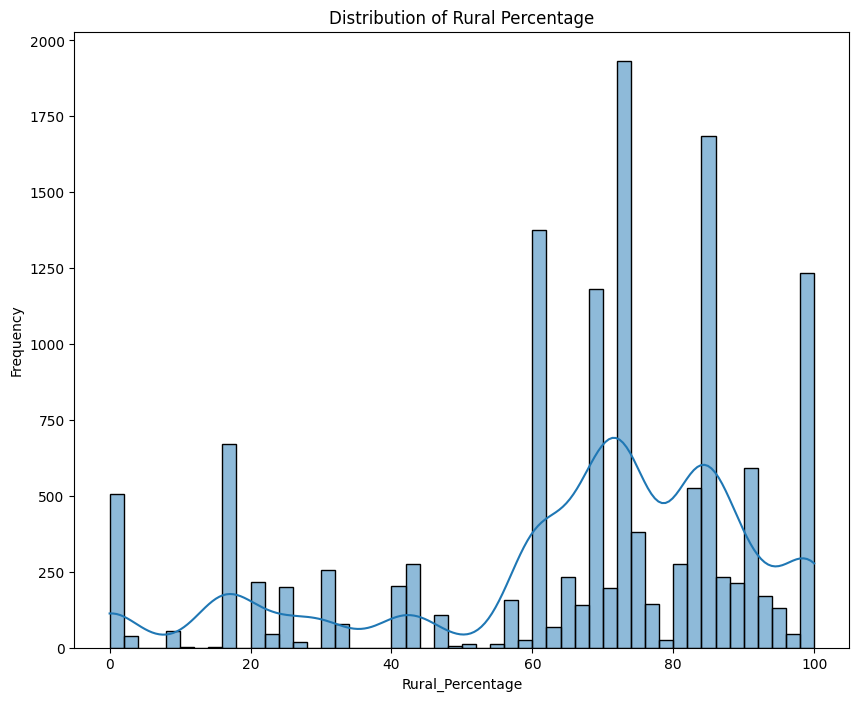

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(df['rural_pct'], bins= 50, kde= True)
plt.title('Distribution of Rural Percentage')
plt.xlabel('Rural_Percentage')
plt.ylabel('Frequency')
plt.show()

Also these bar show that the rural people tend to take more loans than people in the urban area.

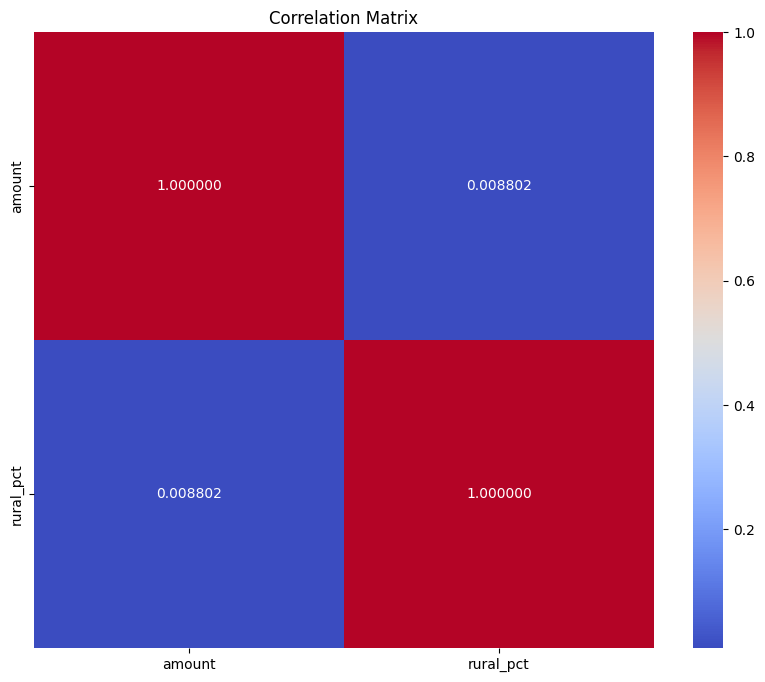

In [ ]:
correlation_matrix = df[['amount' , 'rural_pct']].corr()
plt.figure(figsize=(10 , 8))
sns.heatmap(correlation_matrix, annot=True, cmap= 'coolwarm', fmt= '2f')
plt.title('Correlation Matrix')
plt.show()

However we can find not a lot of significant correalation between loan amount and rural pct score.